In [6]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt 
import cv2
import torch
import yaml

from modelLoader import loadFromConfig
from dataloader.CMUpanoptic import CMUHeatmapDataset
from util.tester import runModel

hms.shape = (224, 224)
heatmaps.shape = (224, 224)
hms.shape = (224, 224)
heatmaps.shape = (224, 224)


C:\Users\tanas\AppData\Local\Temp\ipykernel_31496\238288642.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


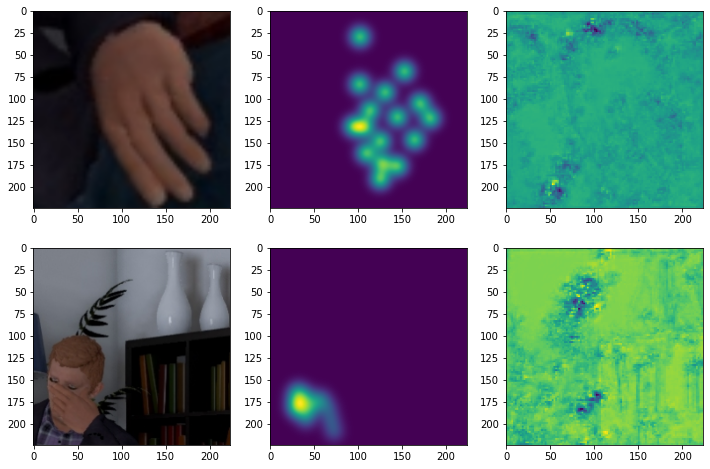

In [19]:
with open('./hourglass/train.yaml', 'r') as f:
    CONFIG = yaml.safe_load(f.read())

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = loadFromConfig(CONFIG).to(device)

amo = 2
fig, ax = plt.subplots(amo, 3, figsize = (3 * 4, amo * 4))
dataset = CMUHeatmapDataset(CONFIG['dataset'], CONFIG['input_size'])

i = 0
for img, hm in dataset:
    nimg = img.permute([1, 2, 0]).numpy()
    ax[i][0].imshow(nimg)
    
    with torch.no_grad():
        heatmap = runModel(model, nimg, CONFIG['input_size'], device).squeeze()
    
    hms = np.sum(hm.numpy(), axis = 0)
    heatmaps = np.sum(heatmap, axis = 0)
    
    print(f"{hms.shape = }")
    print(f"{heatmaps.shape = }")
    
    ax[i][1].imshow(hms)
    ax[i][2].imshow(heatmaps)

    i += 1
    if i >= amo:
        break
    
fig.show()